In [2]:
from pathlib import Path
import json
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

In [3]:
root_path = Path.cwd().parent / "results"
output_path = Path.cwd().parent / "analysis_results" / "ratios_visualizations"
output_path.mkdir(exist_ok=True)

In [4]:
models = [model for model in root_path.iterdir() if
          model.is_dir() and not model.name.startswith('pythia') and not model.name.startswith(
              'qwen') and not model.name.startswith('llama')]

In [5]:
prompting_pairs = {
    'standard': [('zero-shot', 'null-shot')],
    'with-reasoning': [('zero-shot', 'null-shot'), ('zero-shot-cot', 'null-shot-cot')]
}

In [26]:
ratios_results = {}
for model in tqdm(models):
    ratios_results[model.name] = {}
    tasks = [task for task in model.iterdir() if task.is_dir()]
    for task in tqdm(tasks):
        ratios_results[model.name][task.name] = {}
        promptings = [prompting for prompting in task.iterdir() if prompting.is_dir()]
        pair_to_compare = prompting_pairs['standard'] if len(promptings) == 2 else prompting_pairs['with-reasoning']
        for pair in tqdm(pair_to_compare):
            pair_key = f"{pair[0]}-{pair[1]}"
            ratios_results[model.name][task.name][pair_key] = {
                'correct_to_incorrect': 0,
                'incorrect_to_correct': 0,
                'correct_to_correct': 0,
                'incorrect_to_incorrect': 0,
                'baseline_summary': None,
                'comparison_summary': None,
            }

            baseline_path = task / pair[0]
            comparison_path = task / pair[1]

            baseline_summary = baseline_path / 'summary.json'
            comparison_summary = comparison_path / 'summary.json'

            with open(baseline_summary) as f:
                baseline_summary = json.load(f)
            with open(comparison_summary) as f:
                comparison_summary = json.load(f)
            ratios_results[model.name][task.name][pair_key]['baseline_summary'] = baseline_summary
            ratios_results[model.name][task.name][pair_key]['comparison_summary'] = comparison_summary

            baseline_files = [file for file in baseline_path.iterdir() if
                              file.is_file() and file.name != 'summary.json']
            comparison_files = [file for file in comparison_path.iterdir() if
                                file.is_file() and file.name != 'summary.json']
            zipped_files = zip(baseline_files, comparison_files)

            for baseline_file, comparison_file in tqdm(zipped_files):
                with open(baseline_file) as f:
                    baseline = json.load(f)
                with open(comparison_file) as f:
                    comparison = json.load(f)

                if baseline['is_correct'] == comparison['is_correct']:
                    if baseline['is_correct'] is True:
                        ratios_results[model.name][task.name][pair_key]['correct_to_correct'] += 1
                    else:
                        ratios_results[model.name][task.name][pair_key]['incorrect_to_incorrect'] += 1
                else:
                    if baseline['is_correct'] is True:
                        ratios_results[model.name][task.name][pair_key]['correct_to_incorrect'] += 1
                    else:
                        ratios_results[model.name][task.name][pair_key]['incorrect_to_correct'] += 1

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]


0it [00:00, ?it/s]


540it [00:00, 4698.67it/s]


 50%|█████     | 1/2 [00:00<00:00,  7.79it/s]


0it [00:00, ?it/s]


540it [00:00, 4902.05it/s]


100%|██████████| 2/2 [00:00<00:00,  7.99it/s]

  5%|▌         | 1/19 [00:00<00:04,  3.97it/s]

  0%|          | 0/2 [00:00<?, ?it/s]


0it [00:00, ?it/s]


476it [00:00, 4752.02it/s]


1187it [00:00, 4839.39it/s][A


 50%|█████     | 1/2 [00:00<00:00,  3.74it/s]


0it [00:00, ?it/s]


493it [00:00, 4924.73it/s]


1187it [00:00, 4837.85it/s][A


100%|██████████| 2/2 [00:00<00:00,  3.74it/s]

 11%|█         | 2/19 [00:00<00:07,  2.38it/s]

  0%|          | 0/2 [00:00<?, ?it/s]


0it [00:00, ?it/s]


494it [00:00, 4938.17it/s]


1200it [00:00, 4981.26it/s][A


 50%|█████     | 1/2 [00:00<00:00,  3.79it/s]


0it [00:00, ?it/s]


500it [00:00, 4996.80it/s]


1200it [00:00, 4953.20it/s]


100%|██████████| 2/2 [00:00<00:00,  3.78it/s]

 16%|█▌        | 3/19 [00:01<00:0

In [27]:
ratios_results

{'gemini-pro-chat': {'math-number': {'zero-shot-null-shot': {'correct_to_incorrect': 6,
    'incorrect_to_correct': 6,
    'correct_to_correct': 81,
    'incorrect_to_incorrect': 447,
    'baseline_summary': {'model': 'gemini-pro-chat',
     'task': 'math-number',
     'pe_technique': 'zero-shot',
     'current_index': 540,
     'is_processing': False,
     'correct': 87,
     'total': 540,
     'accuracy': 16.11111111111111,
     'created_at': '2024-04-30-11-33-56'},
    'comparison_summary': {'model': 'gemini-pro-chat',
     'task': 'math-number',
     'pe_technique': 'null-shot',
     'current_index': 540,
     'is_processing': False,
     'correct': 87,
     'total': 540,
     'accuracy': 16.11111111111111,
     'created_at': '2024-04-30-11-46-18'}},
   'zero-shot-cot-null-shot-cot': {'correct_to_incorrect': 41,
    'incorrect_to_correct': 53,
    'correct_to_correct': 49,
    'incorrect_to_incorrect': 397,
    'baseline_summary': {'model': 'gemini-pro-chat',
     'task': 'math-num

In [28]:
with open(Path.cwd().parent / "analysis_results" / 'ratios_results.json', 'w') as f:
    json.dump(ratios_results, f)

# Dataframe

In [7]:
# Collect all rows in a list
rows = []

for model, tasks in ratios_results.items():
    for task, pairs in tasks.items():
        for pair, results in pairs.items():
            rows.append({
                'model': model,
                'task': task,
                'pair': pair,
                'correct_to_incorrect': results['correct_to_incorrect'],
                'incorrect_to_correct': results['incorrect_to_correct'],
                'no_change': results['correct_to_correct'] + results['incorrect_to_incorrect'],
                'baseline_accuracy': results['baseline_summary']['accuracy'],
                'comparison_accuracy': results['comparison_summary']['accuracy'],
                'count': results['baseline_summary']['total']
            })

# Create a DataFrame from the list of rows
df = pd.DataFrame(rows, columns=['model', 'task', 'pair', 'correct_to_incorrect', 'incorrect_to_correct', 'no_change', 'baseline_accuracy', 'comparison_accuracy', 'count'])

# Save the DataFrame to a CSV file
df.to_csv(Path.cwd().parent / "analysis_results" / 'ratios_results.csv', index=False)

In [8]:
df = pd.read_csv(Path.cwd().parent / "analysis_results" / 'ratios_results.csv')

# Analysis

In [41]:
def compute_average_from_df(target_df, suffix):
    target_df.loc[:, 'correct_to_incorrect'] = target_df.loc[:, 'correct_to_incorrect'] / target_df.loc[:, 'count'] * 100
    target_df.loc[:, 'incorrect_to_correct'] = target_df.loc[:, 'incorrect_to_correct'] / target_df.loc[:, 'count'] * 100
    target_df.loc[:, 'no_change'] = target_df.loc[:, 'no_change'] / filtered_df.loc[:, 'count'] * 100

    # Compute average correct_to_incorrect, incorrect_to_correct, no_change in general
    average_correct_to_incorrect = target_df['correct_to_incorrect'].mean()
    average_incorrect_to_correct = target_df['incorrect_to_correct'].mean()
    average_no_change = target_df['no_change'].mean()
    
    # Pretty print the results
    print(f"Average percentage of incorrect to correct: {average_incorrect_to_correct:.2f}%")
    print(f"Average percentage of correct to incorrect: {average_correct_to_incorrect:.2f}%")
    print(f"Average percentage of no change: {average_no_change:.2f}%")

    # Compute average correct_to_incorrect, incorrect_to_correct, no_change per model
    average_correct_to_incorrect_per_model = target_df.groupby('model')['correct_to_incorrect'].mean()
    average_incorrect_to_correct_per_model = target_df.groupby('model')['incorrect_to_correct'].mean()
    average_no_change_per_model = target_df.groupby('model')['no_change'].mean()
    
    # Combine into a table
    model_summary = pd.concat([average_correct_to_incorrect_per_model, average_incorrect_to_correct_per_model, average_no_change_per_model], axis=1)
    model_summary.columns = ['Average Correct to Incorrect', 'Average Incorrect to Correct', 'Average No Change']
    
    model_summary.to_csv(Path.cwd().parent / "analysis_results" / f'ratios_results_model_summary_{suffix}.csv')

    # Compute per task
    average_correct_to_incorrect_per_task = target_df.groupby('task')['correct_to_incorrect'].mean()
    average_incorrect_to_correct_per_task = target_df.groupby('task')['incorrect_to_correct'].mean()
    average_no_change_per_task = target_df.groupby('task')['no_change'].mean()
    
    # Combine into a table
    task_summary = pd.concat([average_correct_to_incorrect_per_task, average_incorrect_to_correct_per_task, average_no_change_per_task], axis=1)
    task_summary.columns = ['Average Correct to Incorrect', 'Average Incorrect to Correct', 'Average No Change']
    task_summary.to_csv(Path.cwd().parent / "analysis_results" / f'ratios_results_task_summary_{suffix}.csv')

# Zero-shot vs Null-shot

In [42]:
# General average
filtered_df = df[df['pair'] == 'zero-shot-null-shot']
compute_average_from_df(filtered_df, 'zero_shot_null_shot_all')

Average percentage of incorrect to correct: 6.51%
Average percentage of correct to incorrect: 9.41%
Average percentage of no change: 84.08%


In [43]:
# Filter only case it improved
filtered_df = df[(df['comparison_accuracy'] > df['baseline_accuracy']) & (df['pair'] == 'zero-shot-null-shot')]
filtered_df

,model,task,pair,correct_to_incorrect,incorrect_to_correct,no_change,baseline_accuracy,comparison_accuracy,count
2,gemini-pro-chat,math-algebra,zero-shot-null-shot,43,69,1075,24.852570,27.042965,1187
4,gemini-pro-chat,anli,zero-shot-null-shot,77,87,1036,51.083333,51.916667,1200
9,gemini-pro-chat,race-m,zero-shot-null-shot,18,27,1391,84.610028,85.236769,1436
15,gemini-pro-chat,math-pre-algebra,zero-shot-null-shot,19,42,810,31.917336,34.557979,871
19,gemini-pro-chat,gsm8k,zero-shot-null-shot,116,309,894,52.388173,67.020470,1319
...,...,...,...,...,...,...,...,...,...
308,claude-3-sonnet,math-algebra,zero-shot-null-shot,86,96,1005,52.822241,53.664701,1187
314,claude-3-sonnet,halueval-summarization,zero-shot-null-shot,1242,1423,7335,53.830000,55.650000,10000
321,claude-3-sonnet,math-pre-algebra,zero-shot-null-shot,56,61,754,63.605052,64.179104,871
332,claude-3-sonnet,halueval-general,zero-shot-null-shot,12,17,4478,81.672953,81.783892,4507


In [44]:
compute_average_from_df(filtered_df, 'zero_shot_null_shot_improved')

Average percentage of incorrect to correct: 7.60%
Average percentage of correct to incorrect: 4.47%
Average percentage of no change: 87.93%


In [45]:
# Filter only case it is not improved
filtered_df = df[(df['comparison_accuracy'] <= df['baseline_accuracy']) & (df['pair'] == 'zero-shot-null-shot')]
filtered_df

,model,task,pair,correct_to_incorrect,incorrect_to_correct,no_change,baseline_accuracy,comparison_accuracy,count
0,gemini-pro-chat,math-number,zero-shot-null-shot,6,6,528,16.111111,16.111111,540
6,gemini-pro-chat,triviaqa,zero-shot-null-shot,462,11,527,70.500000,25.400000,1000
8,gemini-pro-chat,halueval-summarization,zero-shot-null-shot,69,61,9870,66.110000,66.030000,10000
11,gemini-pro-chat,strategyqa,zero-shot-null-shot,495,102,1693,67.598253,50.436681,2290
13,gemini-pro-chat,winogrande,zero-shot-null-shot,102,93,1072,63.693765,62.983425,1267
...,...,...,...,...,...,...,...,...,...
329,claude-3-sonnet,halueval-qa,zero-shot-null-shot,2737,1772,5491,52.240000,42.590000,10000
330,claude-3-sonnet,race-h,zero-shot-null-shot,658,268,2572,67.838765,56.689537,3498
334,claude-3-sonnet,math-geometry,zero-shot-null-shot,44,24,411,32.359081,28.183716,479
336,claude-3-sonnet,math-count-prob,zero-shot-null-shot,40,34,400,34.177215,32.911392,474


In [46]:
compute_average_from_df(filtered_df, 'zero_shot_null_shot_not_improved')

Average percentage of incorrect to correct: 5.49%
Average percentage of correct to incorrect: 14.05%
Average percentage of no change: 80.46%


## Zero-shot CoT vs Null-shot CoT

In [47]:
# General average
filtered_df = df[df['pair'] == 'zero-shot-cot-null-shot-cot']
compute_average_from_df(filtered_df, 'zero_shot_cot_null_shot_cot_all')

Average percentage of incorrect to correct: 8.08%
Average percentage of correct to incorrect: 13.74%
Average percentage of no change: 78.18%


In [48]:
# Filter only case it improved
filtered_df = df[(df['comparison_accuracy'] > df['baseline_accuracy']) & (df['pair'] == 'zero-shot-cot-null-shot-cot')]
filtered_df

,model,task,pair,correct_to_incorrect,incorrect_to_correct,no_change,baseline_accuracy,comparison_accuracy,count
1,gemini-pro-chat,math-number,zero-shot-cot-null-shot-cot,41,53,446,16.666667,18.888889,540
3,gemini-pro-chat,math-algebra,zero-shot-cot-null-shot-cot,78,192,917,33.192923,42.796967,1187
16,gemini-pro-chat,math-pre-algebra,zero-shot-cot-null-shot-cot,54,125,692,39.609644,47.761194,871
22,gemini-pro-chat,aqua,zero-shot-cot-null-shot-cot,43,53,158,48.818898,52.755906,254
29,gemini-pro-chat,math-geometry,zero-shot-cot-null-shot-cot,23,40,416,19.415449,22.964509,479
31,gemini-pro-chat,math-count-prob,zero-shot-cot-null-shot-cot,17,36,421,17.721519,21.729958,474
33,gemini-pro-chat,math-pre-calc,zero-shot-cot-null-shot-cot,26,30,490,17.399267,18.131868,546
35,palm-2-chat,math-number,zero-shot-cot-null-shot-cot,5,11,524,2.777778,3.888889,540
37,palm-2-chat,math-algebra,zero-shot-cot-null-shot-cot,28,62,1097,4.212300,7.076664,1187
44,palm-2-chat,race-m,zero-shot-cot-null-shot-cot,104,109,1223,71.587744,71.935933,1436


In [49]:
compute_average_from_df(filtered_df, 'zero_shot_cot_null_shot_cot_improved')

Average percentage of incorrect to correct: 10.93%
Average percentage of correct to incorrect: 7.00%
Average percentage of no change: 82.07%


In [50]:
# Filter only case it is not improved
filtered_df = df[(df['comparison_accuracy'] <= df['baseline_accuracy']) & (df['pair'] == 'zero-shot-cot-null-shot-cot')]
filtered_df

,model,task,pair,correct_to_incorrect,incorrect_to_correct,no_change,baseline_accuracy,comparison_accuracy,count
5,gemini-pro-chat,anli,zero-shot-cot-null-shot-cot,98,51,1051,48.916667,45.000000,1200
7,gemini-pro-chat,triviaqa,zero-shot-cot-null-shot-cot,617,6,377,62.000000,0.900000,1000
10,gemini-pro-chat,race-m,zero-shot-cot-null-shot-cot,56,28,1352,84.052925,82.103064,1436
12,gemini-pro-chat,strategyqa,zero-shot-cot-null-shot-cot,1498,1,791,66.419214,1.048035,2290
14,gemini-pro-chat,winogrande,zero-shot-cot-null-shot-cot,788,0,479,62.430939,0.236780,1267
...,...,...,...,...,...,...,...,...,...
326,claude-3-sonnet,gsm8k,zero-shot-cot-null-shot-cot,83,69,1167,63.381350,62.319939,1319
328,claude-3-sonnet,aqua,zero-shot-cot-null-shot-cot,48,26,180,59.448819,50.787402,254
335,claude-3-sonnet,math-geometry,zero-shot-cot-null-shot-cot,126,11,342,30.897704,6.889353,479
337,claude-3-sonnet,math-count-prob,zero-shot-cot-null-shot-cot,145,10,319,36.708861,8.227848,474


In [51]:
compute_average_from_df(filtered_df, 'zero_shot_cot_null_shot_cot_not_improved')

Average percentage of incorrect to correct: 6.23%
Average percentage of correct to incorrect: 18.11%
Average percentage of no change: 75.66%


# Visualization

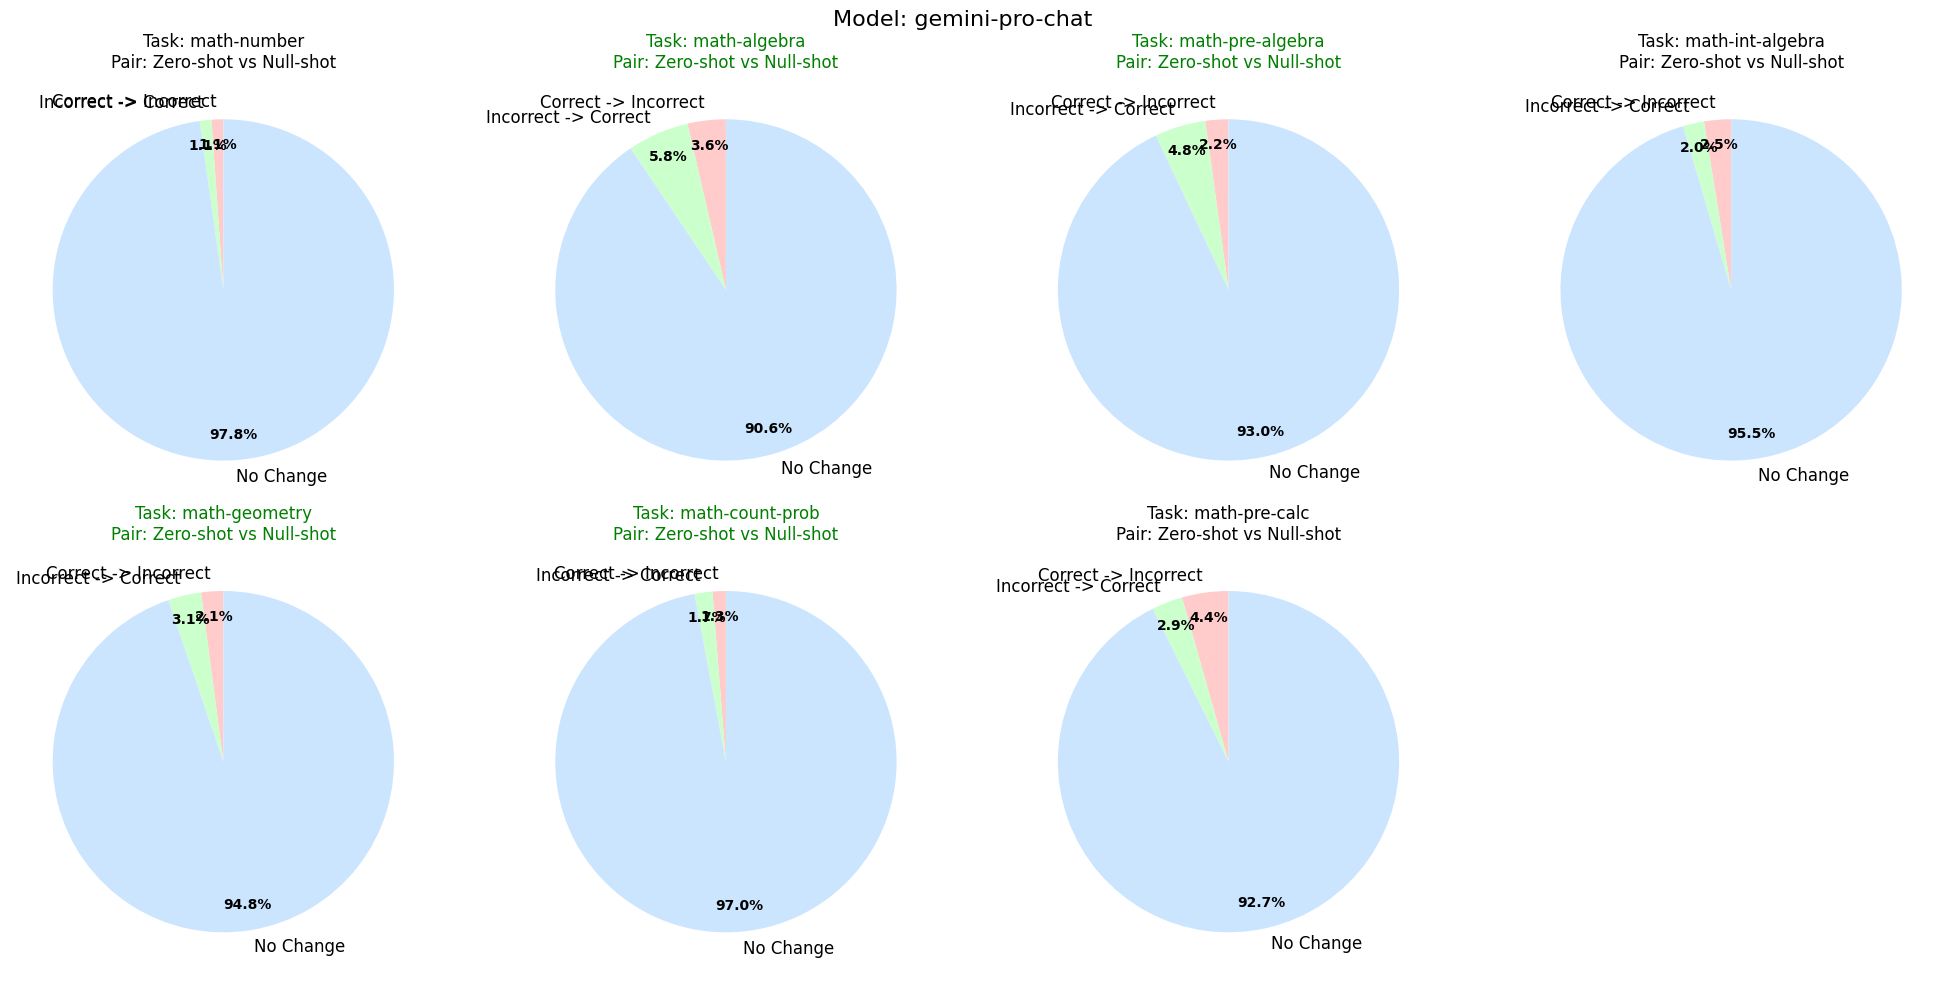

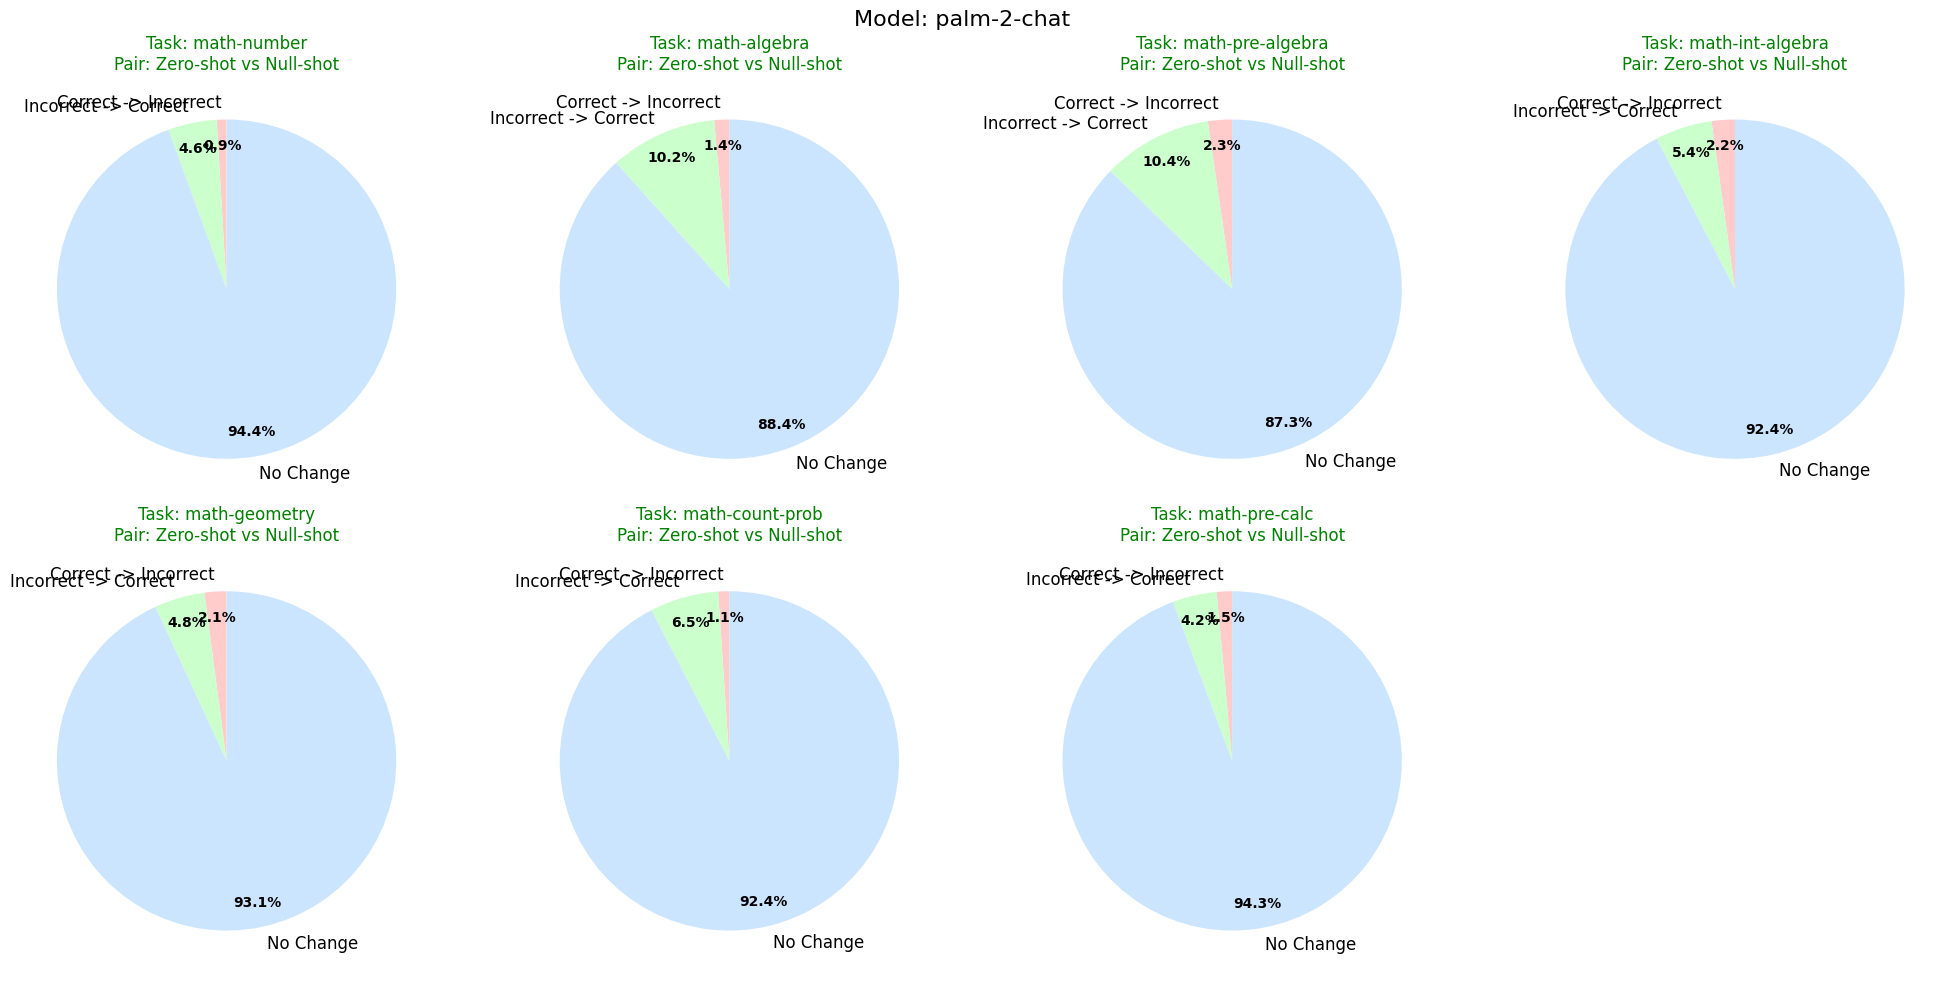

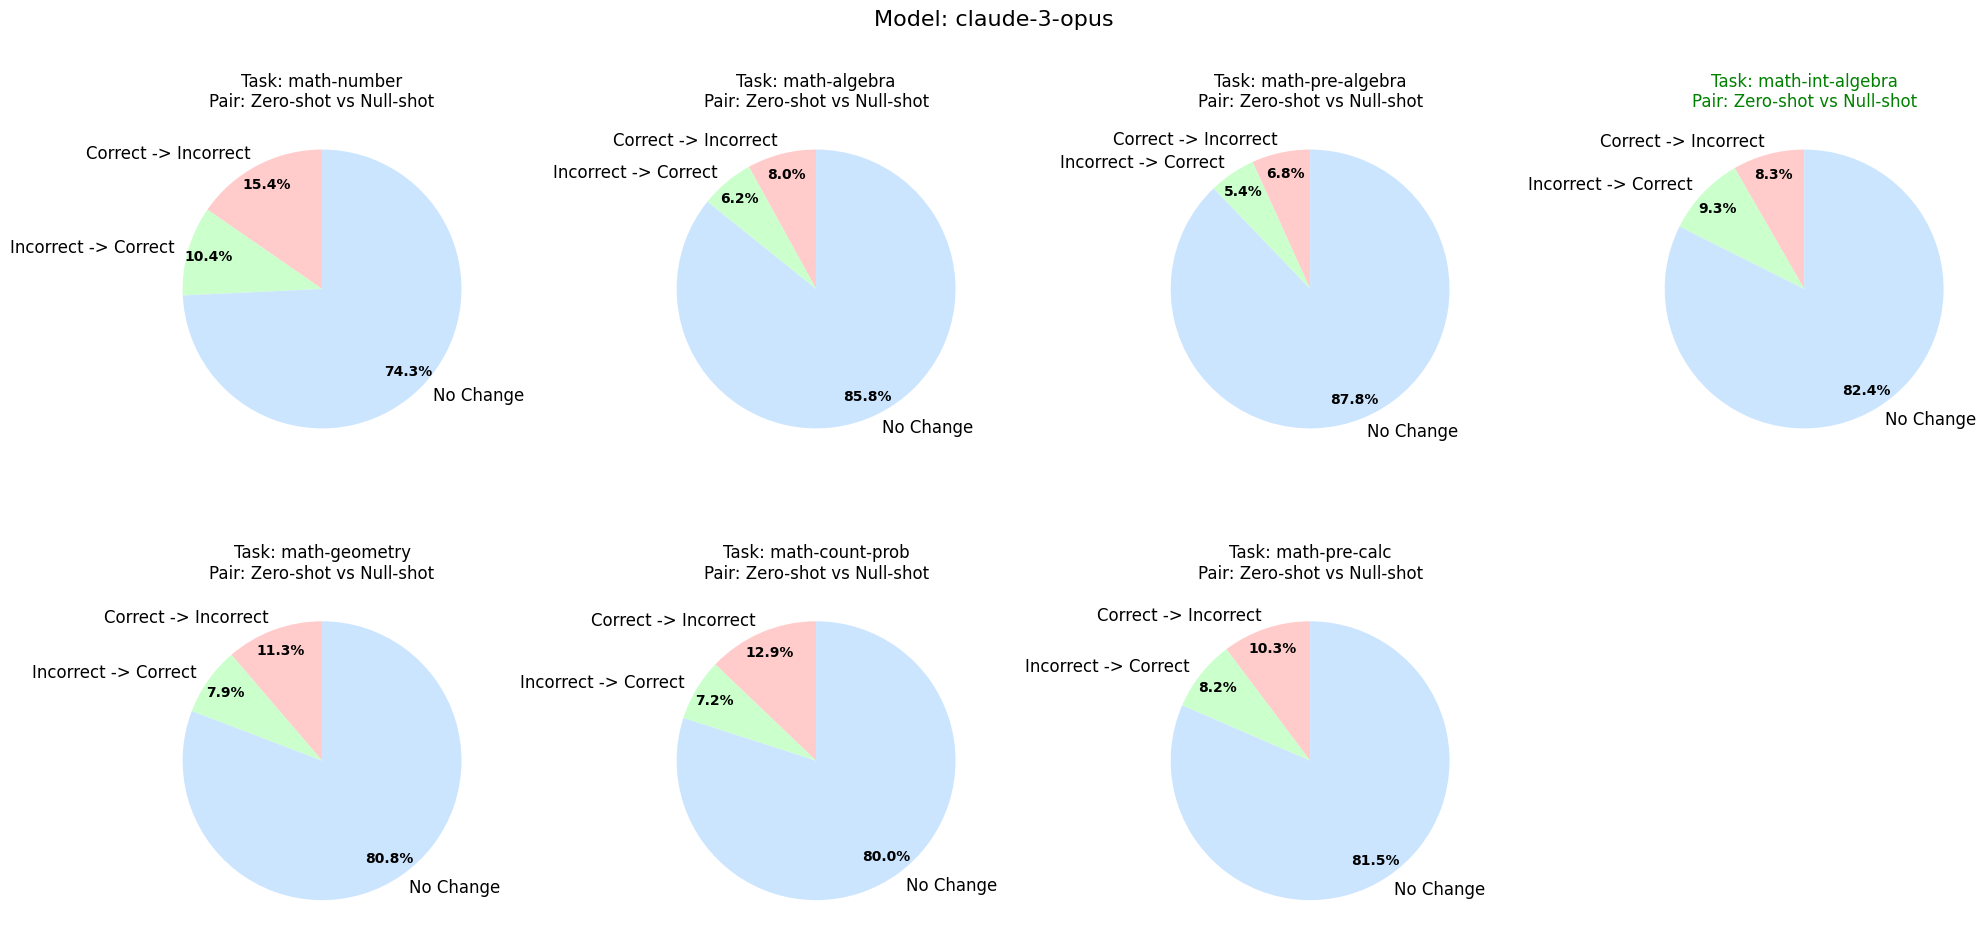

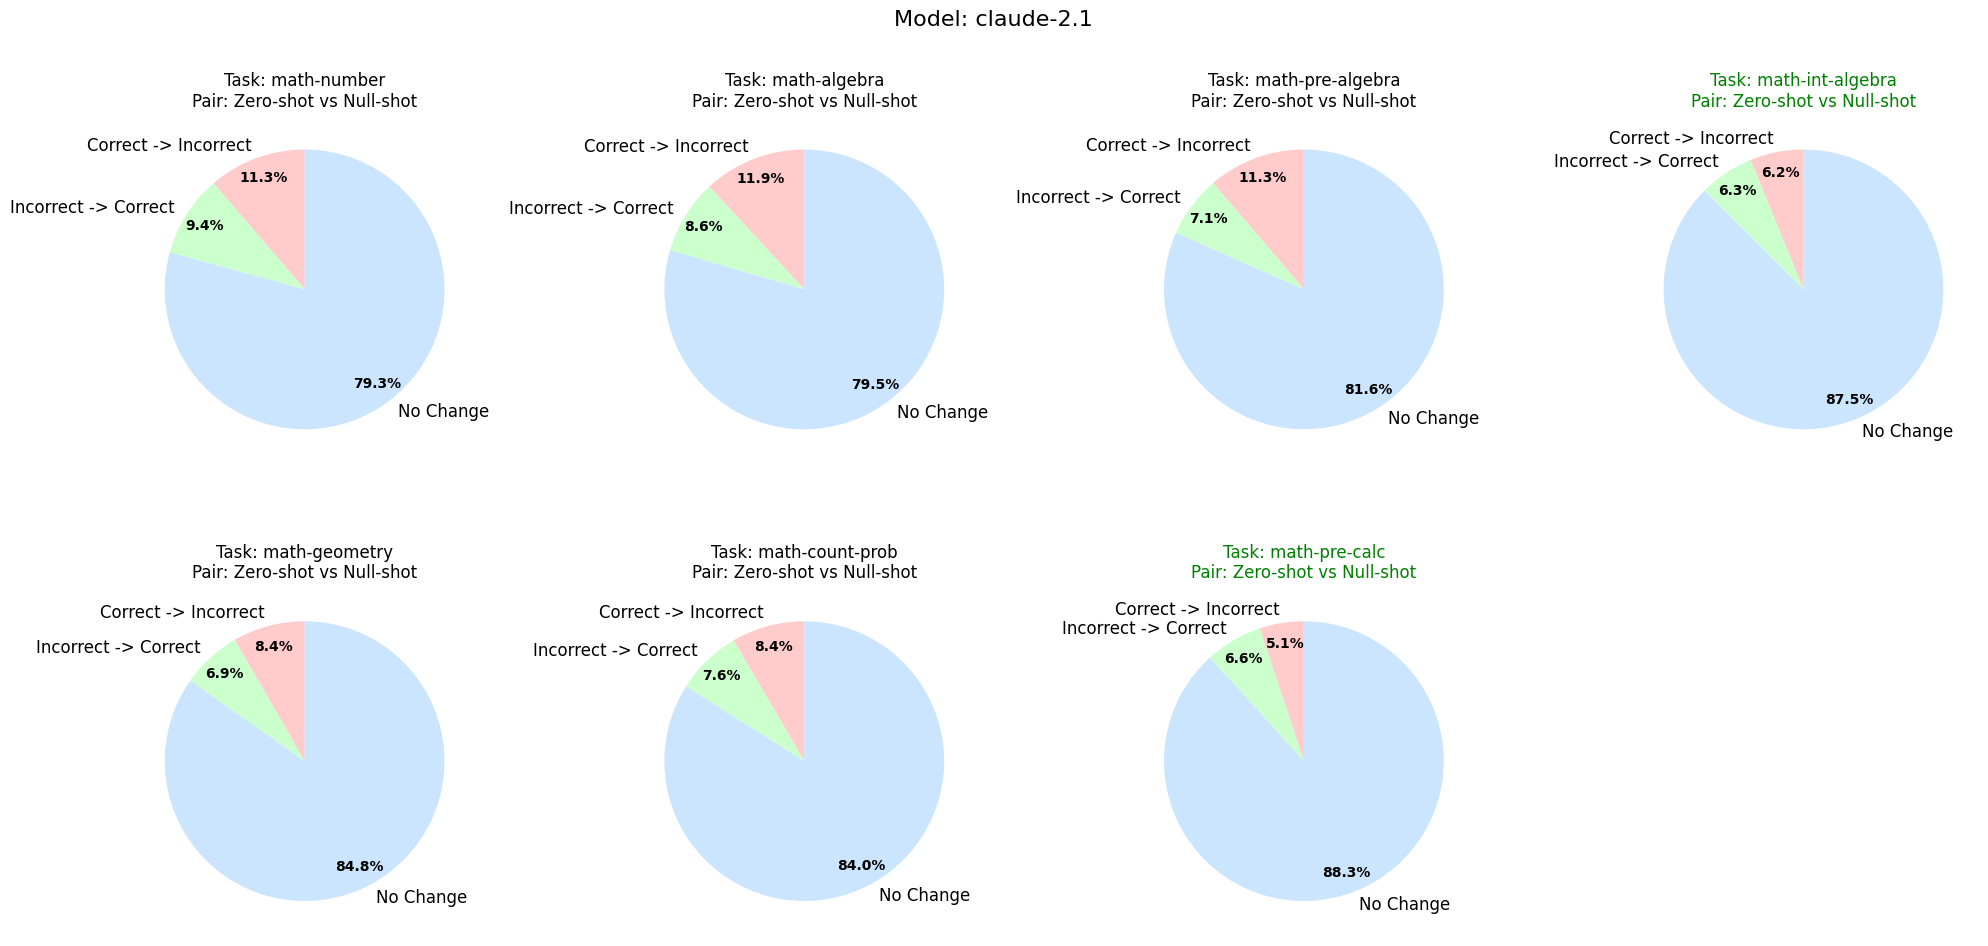

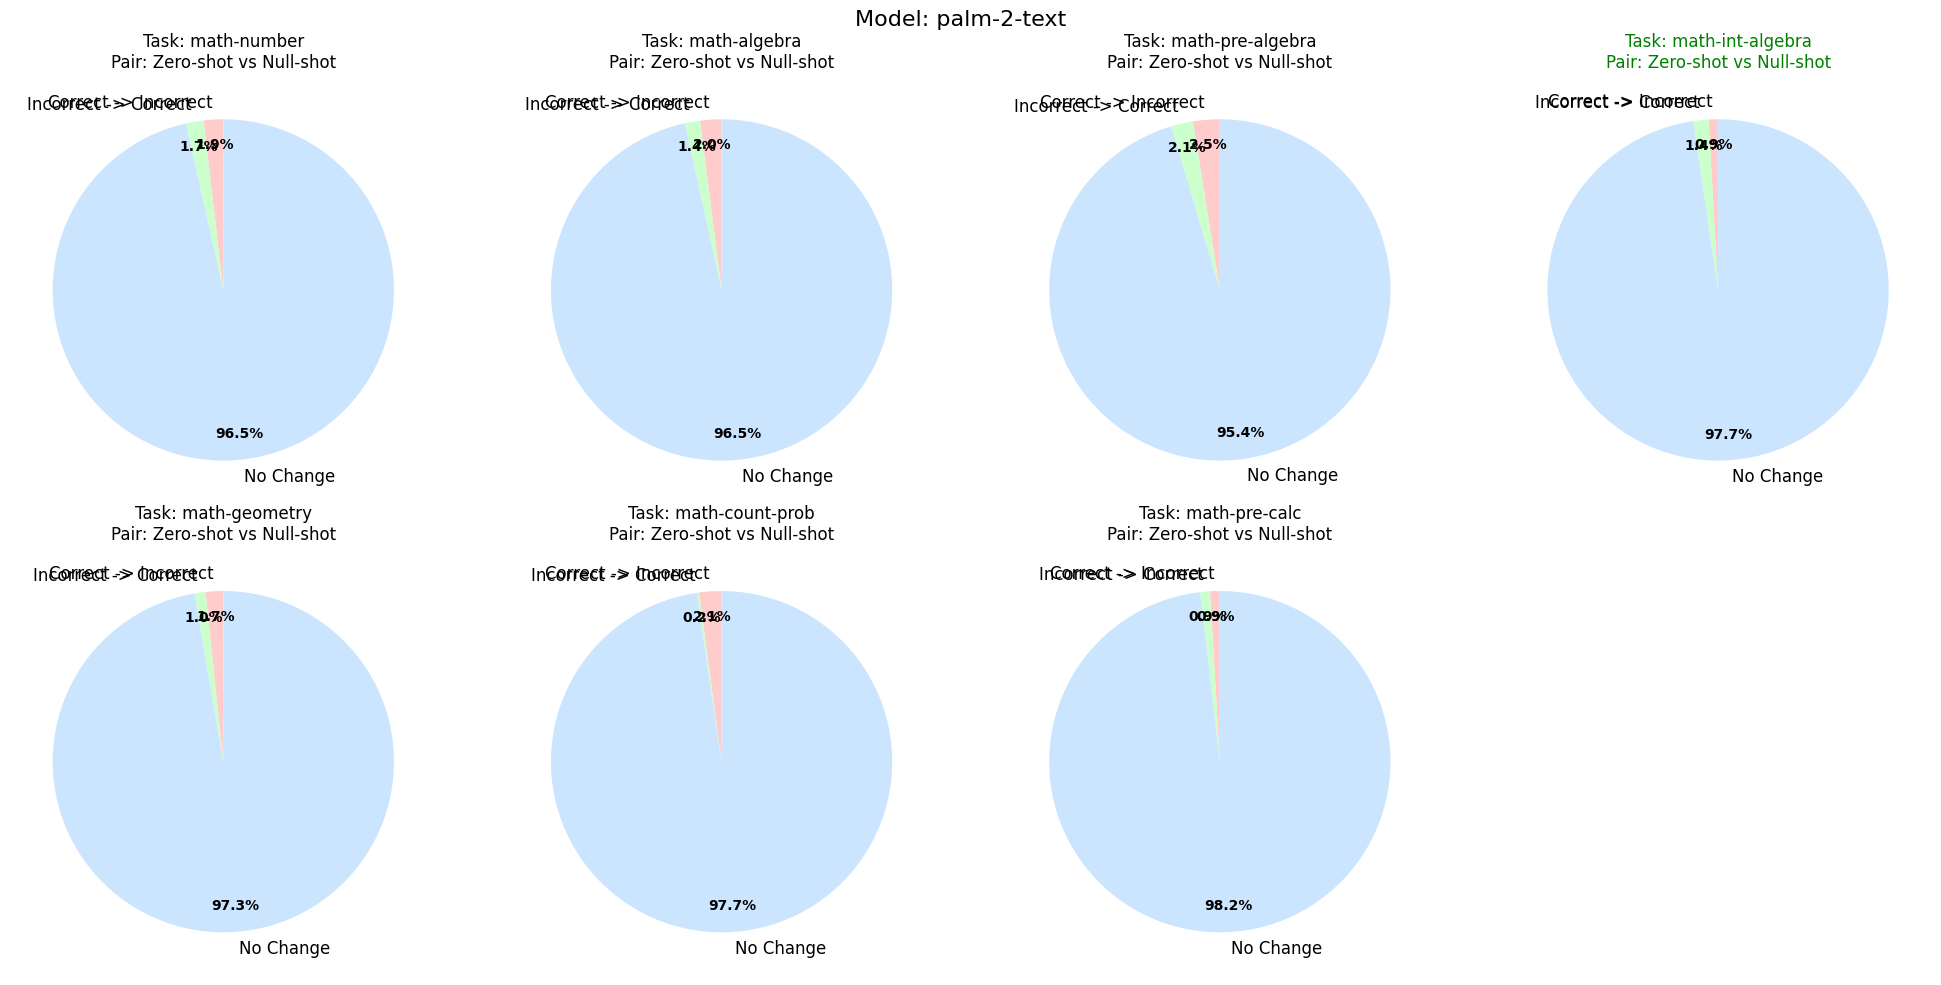

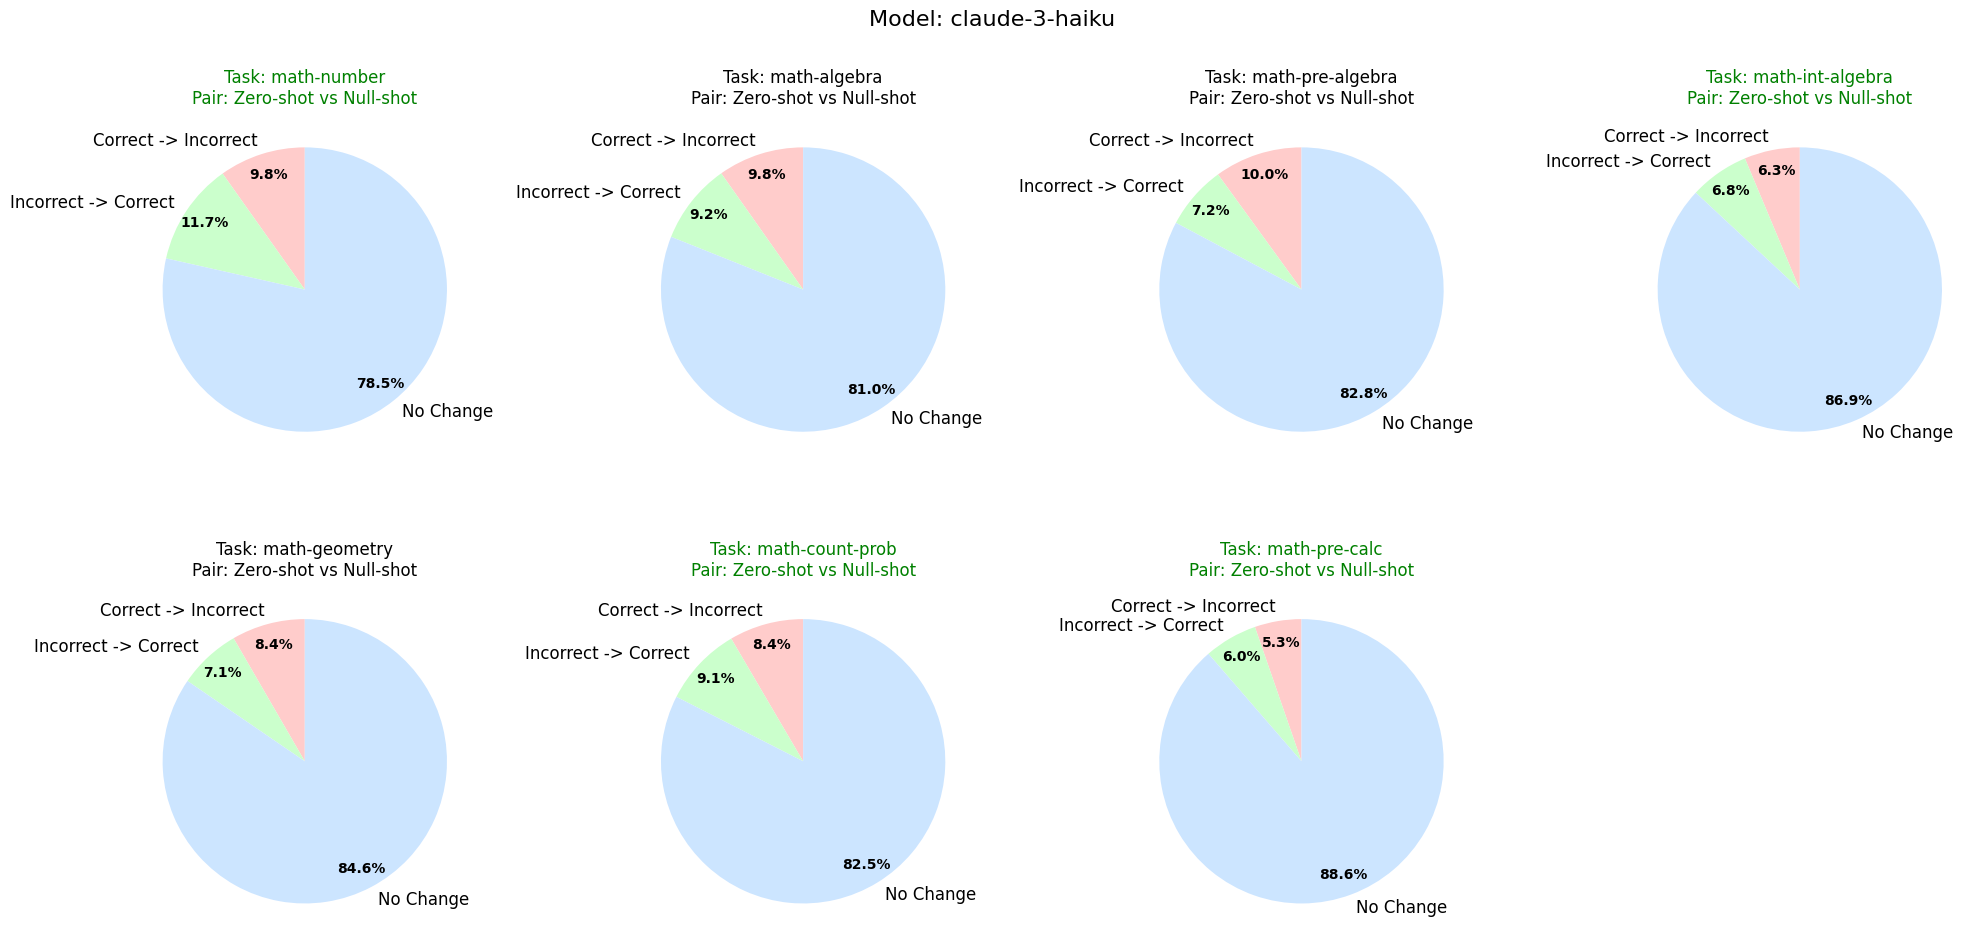

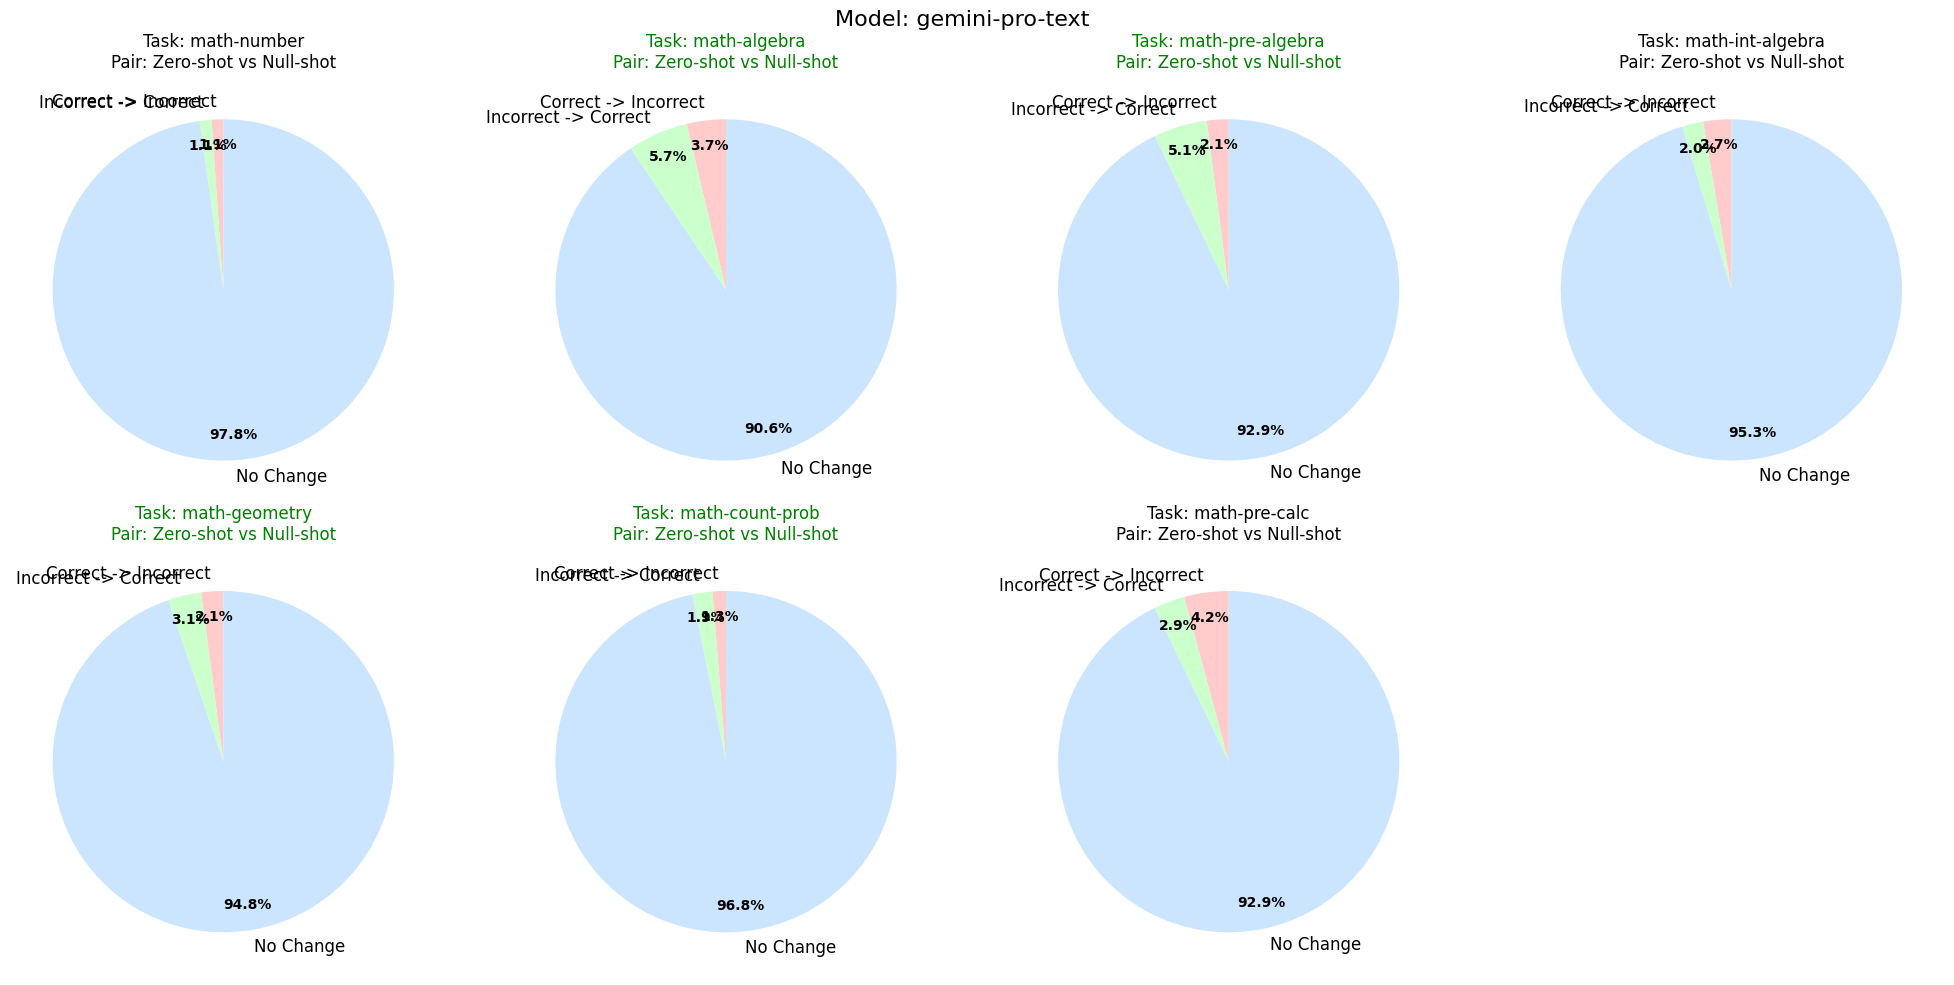

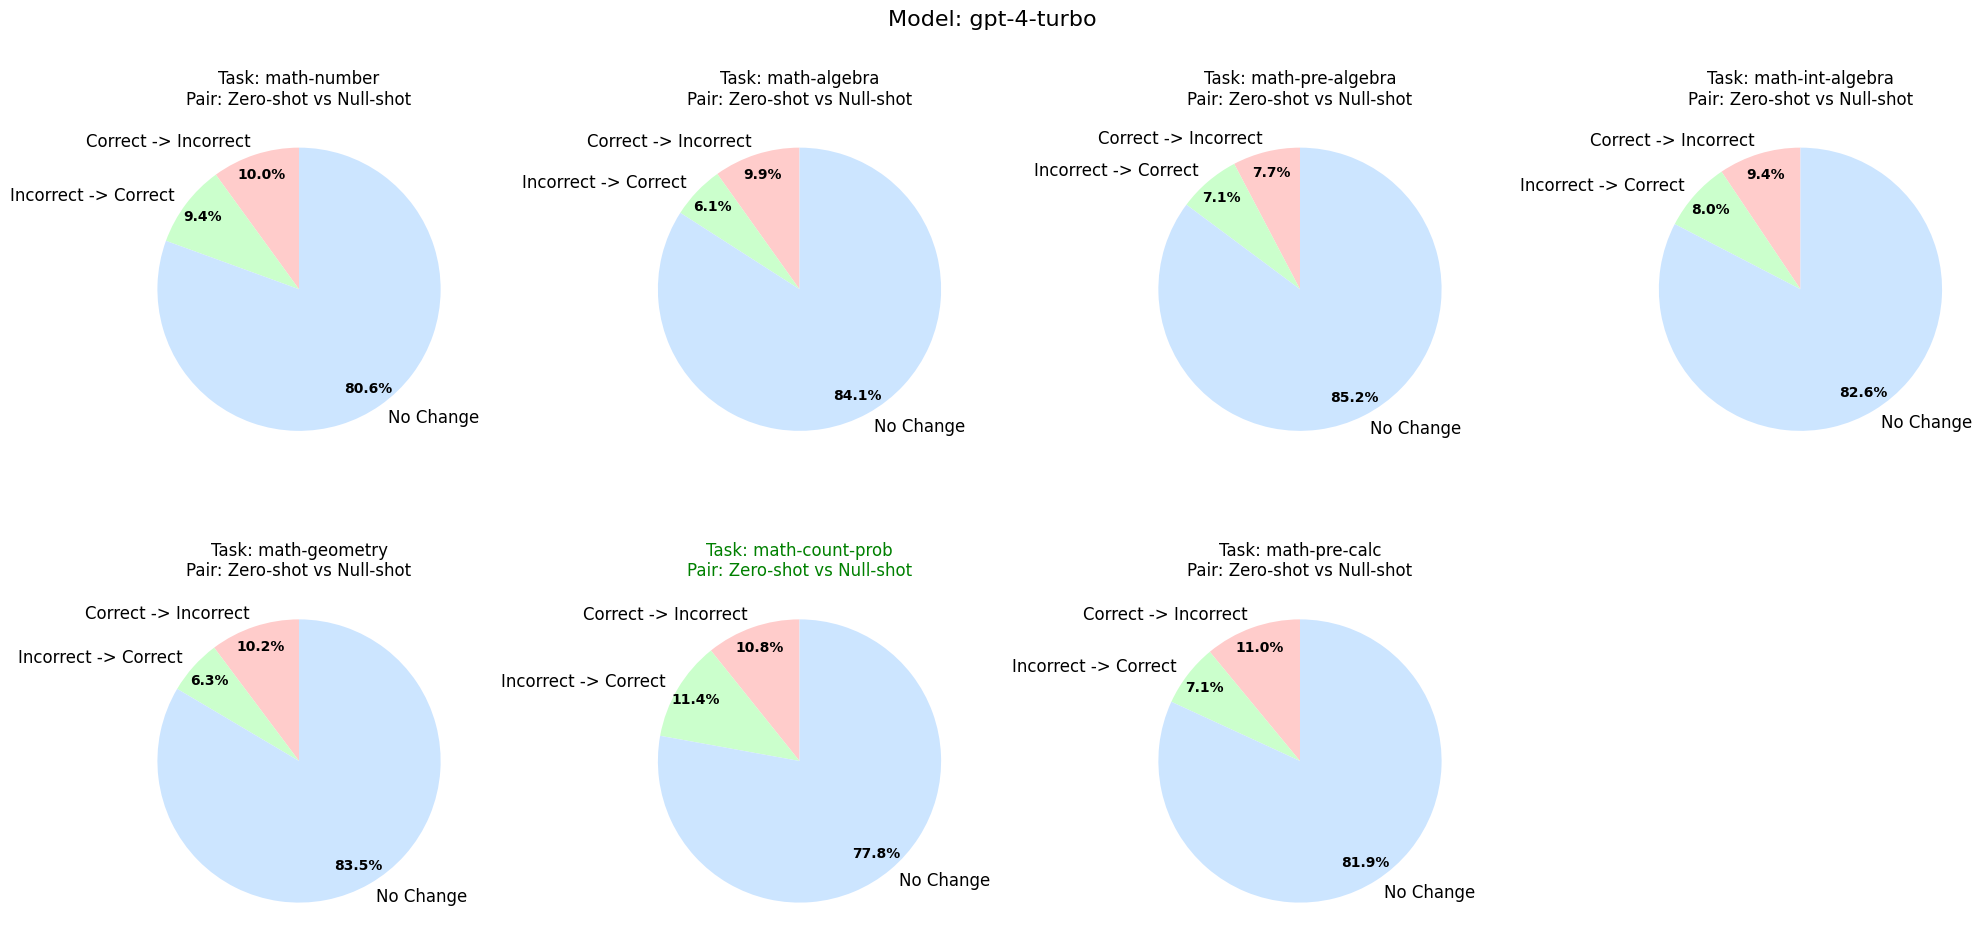

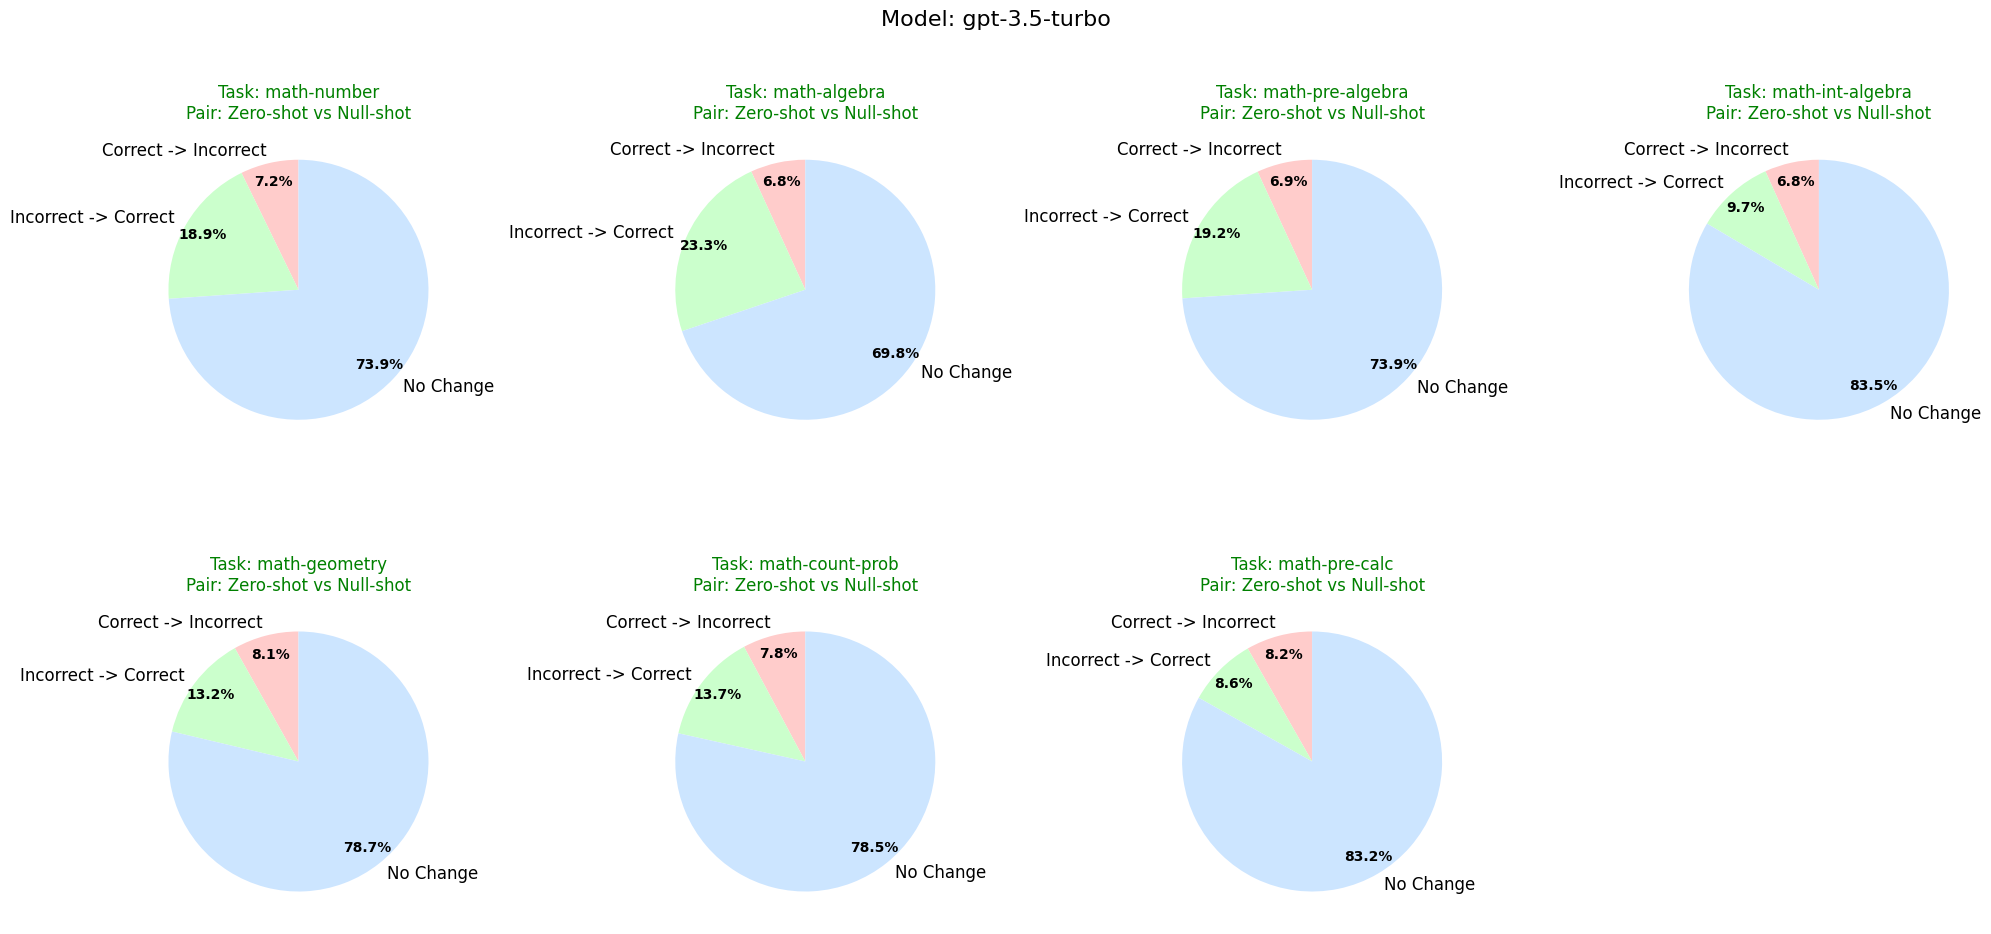

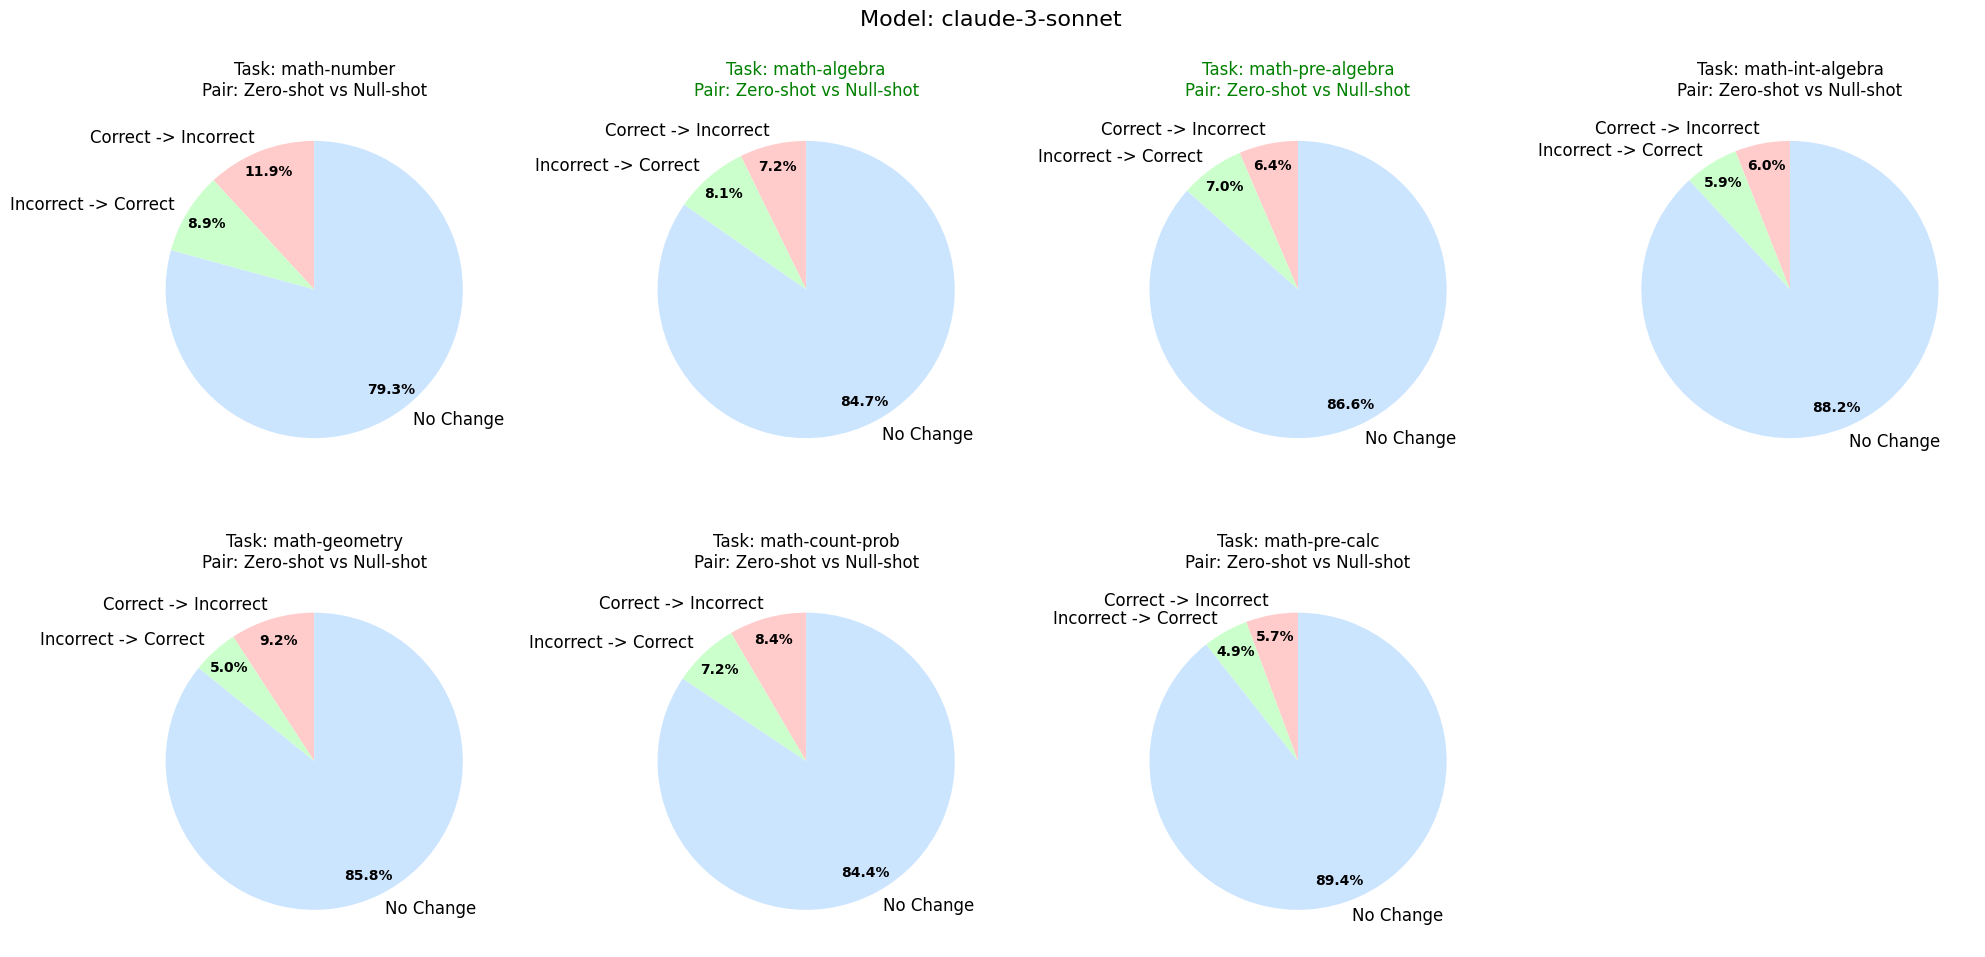

In [49]:
# Number of pie charts per row
pie_charts_per_row = 4

colors = ['#ffcccb', '#cbffcc', '#cce5ff']

readable_pair = {
    'zero-shot-null-shot': 'Zero-shot vs Null-shot',
    'zero-shot-cot-null-shot-cot': '0CoT vs ∅CoT'
}

for model, tasks in ratios_results.items():
    # Calculate the number of subplots needed
    total_pairs = sum(len(pairs) for pairs in tasks.values())
    num_rows = 2

    fig, axes = plt.subplots(num_rows, pie_charts_per_row, figsize=(20, 5 * num_rows))

    # Flatten axes array for easier indexing
    axes = axes.flatten()

    # Track the subplot index
    subplot_index = 0

    for task, pairs in tasks.items():
        if not task.startswith('math'):
            continue
        for pair, results in pairs.items():
            if pair != "zero-shot-null-shot":
                continue
            correct_to_incorrect = results['correct_to_incorrect']
            incorrect_to_correct = results['incorrect_to_correct']
            no_change = results['correct_to_correct'] + results['incorrect_to_incorrect']
            labels = ['Correct -> Incorrect', 'Incorrect -> Correct', 'No Change']
            sizes = [correct_to_incorrect, incorrect_to_correct, no_change]

            ax = axes[subplot_index]
            wedges, texts, autotexts = ax.pie(sizes, labels=labels, colors=colors, startangle=90, autopct='%1.1f%%', textprops={'fontsize': 12}, pctdistance=0.85)

            # Adjust label position to avoid overlap
            for text in texts:
                text.set_fontsize(12)
            for autotext in autotexts:
                autotext.set_fontsize(10)
                autotext.set_fontweight('bold')

            is_compare_better_than_baseline = results['baseline_summary']['accuracy'] < results['comparison_summary']['accuracy']
            # Set title to green
            if is_compare_better_than_baseline:
                ax.set_title(f"Task: {task}\nPair: {readable_pair[pair]}", color='green')
            else:
                ax.set_title(f"Task: {task}\nPair: {readable_pair[pair]}")

            subplot_index += 1

    fig.suptitle(f"Model: {model}", fontsize=16)

    # Hide any unused subplots
    for i in range(subplot_index, len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    # Save at high resolution
    plt.savefig(output_path / f"{model}_ratios.png")